In [1]:
from konlpy.tag import Okt
# 한글 형태소 분서을 위한 konlpy에서 Otk 임포트!
import numpy as np # 고성능의 수치계산을 위해 사용하는 라이브러리!
import pandas as pd # 읽어온 data를 정제하기 위한 라이브러리
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리
import seaborn as sns # 시각화를 위한 라이브러리

### 댓글을 수집하여 긍정댓글과 부정댓글을 워드클라우드로 시각화 하기
##### label 1이 긍정댓글 0이 부정댓글

In [2]:
data = pd.read_csv('ratings.txt', sep = "\t", engine='python', encoding = "UTF8")
# txt파일을 불러서 dataframe 형태로 변경
data.head()

id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1

In [3]:
data_positive = data[data['label'] == 1]
data_positive.head()

id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1

In [4]:
data_positive_text = data_positive['document']
data_positive_text.head()

0                                  어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1    디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                 폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3    와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                          안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
Name: document, dtype: object

In [5]:
type(data_positive['document'])

pandas.core.series.Series

In [6]:
data_positive_str = str(data_positive['document'])
type(data_positive_str)

str

In [7]:
import re

In [8]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', str(text))
    #입력받은 내용의 한글을 제외한 다른 문자를 빈문자열로 변경한다.
    return result

In [9]:
# 각 피처마다 데이터 전처리를 적용합니다.(한글을 제외한 내용 삭제)
data_positive['document'] = data_positive['document'].apply(lambda x: text_cleaning(x))
data_positive.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...      1
2   4655635                   폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고      1
3   9251303   와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지      1
4  10067386                         안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화      1

In [10]:
document_corpus_positive = "".join(data_positive['document'].tolist())
# 리스트로 만들어서 join을 사용하여 하나의 문자열(말뭉치)로 만들어준다.
document_corpus_positive

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화완전 감동입니다 다시봐도 감동개들의 전쟁 나오나요 나오면 빠로 보고 싶음굿바보가 아니라 병 쉰 인듯내 나이와 같은 영화를 지금 본 나는 감동적이다하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다재밌다고질라니무 귀엽다능ㅋㅋ영화의 오페라화라고 해야할 작품 극단적 평갈림은 어쩔 수 없는 듯도 반전 좋았제 평점 왜 낮아 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다네고시에이터랑 소재만 같을 뿐 아무런 관련없음단연 최고가면 갈수록 더욱 빠져드네요 밀회 화이팅어생각없이 봤는데 상당한 수작일본영화 년내 최고로 마음에 들었다강렬한 임팩트가 일품오랜만에 본 제대로 된 범죄스릴러그런 때가 있었다 사랑해도 아니고 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다마지막씬을 잊을수가 없다강압적용서세뇌적용서에 대한 비판중세시대명작 굿 평점이왜이래시간짜리 영상이 존재한다면 죽기전에 꼭 한번 보고싶다 아름답고 슬픈  제니퍼코넬리의 눈부신 아역시절 로버트드니로의 마지막 웃는 장면까지 정말 가슴속에 영원히 기억될 최고의 명작이다사람이 어떻게 저런짓을 할 수가 있는지ㅡㅡ 보는 내가 다 화나더라인간의 잠재된 악마성은 여러 시간과 공간 속에서 존속해왔다 이 다큐는 그것을 엉뚱하면서도 광적으로 재현하였다최고다 삼일동안 쉬는틈틈이 잠도 줄여가면서 봤

In [11]:
type(document_corpus_positive) # 말뭉치의 타입은 String 이다.

str

In [12]:
from konlpy.tag import Okt
from collections import Counter
# 텍스트 마이닝을 할때 빈도수를 집계하는 기능

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns_positive = nouns_tagger.nouns(document_corpus_positive)
count_positive = Counter(nouns_positive)
# document_corpus 에 들어있는 데이터 중 명사만 골라내서 빈도를 카운트

In [13]:
count_positive

Counter({'때': 3793,
         '보고': 3636,
         '지금': 2012,
         '다시': 3028,
         '디자인': 21,
         '학생': 105,
         '외국': 68,
         '디자이너': 10,
         '그': 2760,
         '일군': 1,
         '전통': 20,
         '통해': 245,
         '발전': 92,
         '문화': 122,
         '산업': 13,
         '사실': 479,
         '우리나라': 484,
         '시절': 447,
         '끝': 971,
         '열정': 166,
         '노라노': 1,
         '저': 860,
         '사람': 3218,
         '꿈': 414,
         '수': 2882,
         '것': 4152,
         '폴리스스토리': 16,
         '시리즈': 786,
         '부터': 115,
         '뉴': 18,
         '하나': 1643,
         '최고': 7431,
         '연기': 4757,
         '진짜': 5421,
         '개': 668,
         '생각': 4489,
         '몰입': 711,
         '영화': 34436,
         '안개': 16,
         '밤하늘': 4,
         '초승달': 1,
         '사랑': 3149,
         '라면': 430,
         '처음': 1471,
         '완전': 1820,
         '감동': 5149,
         '전쟁': 418,
         '빠': 31,
         '굿': 1107,
         '바보': 1

In [14]:
# 한글자 키워드를 제거합니다.
remove_char_counter_positive = Counter({x : count_positive[x] for x in count_positive if len(x) > 1})
# 길이가 1보다 큰 명사(한글자를 제외한 단어만)들만 카운트해서 담아준다.
remove_char_counter_positive

Counter({'보고': 3636,
         '지금': 2012,
         '다시': 3028,
         '디자인': 21,
         '학생': 105,
         '외국': 68,
         '디자이너': 10,
         '일군': 1,
         '전통': 20,
         '통해': 245,
         '발전': 92,
         '문화': 122,
         '산업': 13,
         '사실': 479,
         '우리나라': 484,
         '시절': 447,
         '열정': 166,
         '노라노': 1,
         '사람': 3218,
         '폴리스스토리': 16,
         '시리즈': 786,
         '부터': 115,
         '하나': 1643,
         '최고': 7431,
         '연기': 4757,
         '진짜': 5421,
         '생각': 4489,
         '몰입': 711,
         '영화': 34436,
         '안개': 16,
         '밤하늘': 4,
         '초승달': 1,
         '사랑': 3149,
         '라면': 430,
         '처음': 1471,
         '완전': 1820,
         '감동': 5149,
         '전쟁': 418,
         '바보': 100,
         '나이': 359,
         '훗날': 12,
         '사하나': 22,
         '감정': 513,
         '이해': 1024,
         '고질': 3,
         '오페라': 44,
         '작품': 2463,
         '극단': 41,
         '갈림': 2,
         '반전

In [15]:
import random
import pytagcloud
# 워드클라우드를 사용할 수 있는 라이브러리
import webbrowser
# 웹브라우저 제어기

pygame 2.0.1 (SDL 2.0.14, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [16]:
# 가장 출현 빈도수가 높은 100개의 단어를 선정합니다.
ranked_tags_positive = remove_char_counter_positive.most_common(100)

# pytagcloud로 출력할 100개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist_positive = pytagcloud.make_tags(ranked_tags_positive, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist_positive, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

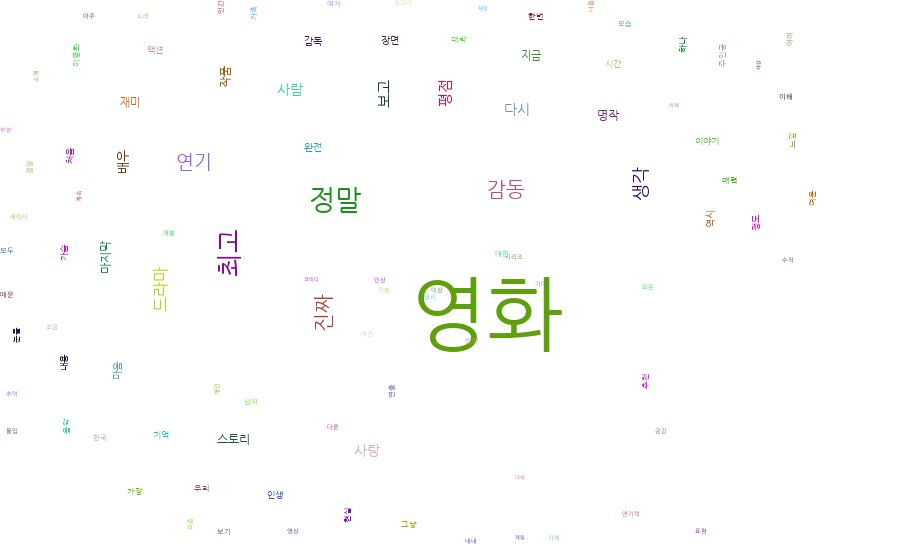

In [17]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
# 웹 브라우저 상에 이미지를 삽입하는 기능
Image(filename='wordcloud.jpg')

In [18]:
data_negative = data[data['label'] == 0]
data_negative.head()

id                     document  label
100000  6826470           이런영화로 관객들한테 돈벌고싶소?      0
100001  6239594  작품 선구안이 없다는게 배우 김태희의 최대 약점.      0
100002  8946612              사극?? 로멘스?? 퓨젼??      0
100003  4800899    ㅋㅋㅋㅋ엿국니네가그렇지므ㅝ 이건뭐 영화도아니고      0
100004  5927640              완죤유치하고 못봐주겠네...      0

In [19]:
# 각 피처마다 데이터 전처리를 적용합니다.(한글을 제외한 내용 삭제)
data_negative['document'] = data_negative['document'].apply(lambda x: text_cleaning(x))
data_negative.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


id                    document  label
100000  6826470           이런영화로 관객들한테 돈벌고싶소      0
100001  6239594  작품 선구안이 없다는게 배우 김태희의 최대 약점      0
100002  8946612                   사극 로멘스 퓨젼      0
100003  4800899   ㅋㅋㅋㅋ엿국니네가그렇지므ㅝ 이건뭐 영화도아니고      0
100004  5927640                완죤유치하고 못봐주겠네      0

In [20]:
document_corpus_negative = "".join(data_negative['document'].tolist())
# 리스트로 만들어서 join을 사용하여 문자열(말뭉치)로 만들어준다.
document_corpus_negative

'이런영화로 관객들한테 돈벌고싶소작품 선구안이 없다는게 배우 김태희의 최대 약점사극 로멘스 퓨젼ㅋㅋㅋㅋ엿국니네가그렇지므ㅝ 이건뭐 영화도아니고완죤유치하고 못봐주겠네이지현님의  는 환상이었다재미없어 연기 넘 오글거려 ㅋㅋㅋ니가 아빠냐시간낭비 차라리 포르노가 더 재밌을듯심리묘사가 중요한데 이건 그냥 폭력만 나오네요원작도 아쉬웠지만 이건 그냥 쓰레기임딱봐도 분량 늘릴라고 작가가 발악하는걸로밖에 안보임 박현지 범죄주인공 의심회장한테 박현지 혼남김치따귀남 의심박현지 엄마 개입주인공 증거잡지만 박현지 감방 못보냄이 패턴 무한 반복종합 평점은 점 드립니다이도 저도 아닌 망작 뭐하자는 건지 모르겠음조윤희는 왜 연기할 때 책을 읽지 연기가 변함이 없네고문 시작하기 직전까지만 몰입해서 봤음 그후로는 아무리 영화라지만 어이가 없다 머리에 총을 맞고도 바로 안죽는 배우 그렇게 고문을 당하고도 마지막에 멀쩡히 걸어다니는 청력도 알아서 회복하는 주인공 연기가 어딘가모르게 이상한 여배우 등등사회 부조리에 미친 놈들이 그냥 돌아가지고 상어가지고 하드코어 쇼한다는 것부터 거지같고 그나마 개가 귀여워서 조금 재밌었고 가장 디테일한 장면이라고 해봤자 제트스키 타고 가는데 앞에서 상어가 머리무는 장면정도집에서 보기에도 시간 아까워서 걍 끔전혀 재미도없고 진부한 공포영화스토리도 그렇고 연기는 볼만한데 너무 재미없어요성룡옵하 턱시도 때문에 별하나 더줄게감독이 택시기사한테 불만이 많은가보다 아 왜 점을 줄수 없는거야 ㅋㅋ이 새끼 영화는 이제 안봐인생 최악영화 개인적으로에휴 킬링타임용으로도 보고 싶지 않은 영화로맨틱 코미디 아니었나봐요 정말 아닌듯개구리 밟아 죽이는 영화가 말하는 자연의 소중함전편보다 액션을 좋아진건 당연한데감동이 영거시기하네아 공포도 아님 이건 이거 연기 짱 못함 어이없음 왜 그렇게 끝나는거야 이거 영화임 돈 아깝다기승전 까지만 있는 영화 사건간의 개연성도 떨어지고 싱겁다마약조직 두목도 결국은 자식 때문에 속 끓이고 지병에 시달리는 평범한 가장기분좋은날봤다가 아열받아쉽게 만든현영한텐 미

In [21]:
# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_negative = nouns_tagger.nouns(document_corpus_negative)
count_negative = Counter(nouns_negative)
# document_corpus 에 들어있는 데이터 중 명사만 골라내서 빈도를 카운트

In [22]:
count_negative

Counter({'영화로': 550,
         '관객': 615,
         '돈': 2509,
         '작품': 1515,
         '선구': 3,
         '안이': 8,
         '배우': 2937,
         '김태희': 37,
         '최대': 79,
         '약점': 11,
         '사극': 95,
         '로': 411,
         '멘스': 20,
         '퓨젼': 2,
         '국': 42,
         '네': 111,
         '므': 18,
         '이건': 2504,
         '뭐': 4011,
         '영화': 32198,
         '완죤': 25,
         '이지현': 11,
         '환상': 89,
         '연기': 3555,
         '니': 274,
         '아빠': 204,
         '시간': 3703,
         '낭비': 488,
         '차라리': 942,
         '포르노': 135,
         '더': 2780,
         '심리': 98,
         '묘사': 117,
         '그냥': 3469,
         '폭력': 126,
         '원작': 1082,
         '쓰레기': 4407,
         '임': 1459,
         '분량': 77,
         '작가': 907,
         '발악': 28,
         '는걸': 142,
         '박현지': 27,
         '범죄': 167,
         '주인공': 1907,
         '의심': 88,
         '회장': 29,
         '김치': 75,
         '따귀': 7,
         '남': 404,
         '엄마

In [23]:
# 한글자 키워드를 제거합니다.
remove_char_counter_negative = Counter({x : count_negative[x] for x in count_positive if len(x) > 1})
# 길이가 1보다 큰 명사(한글자를 제외한 단어만)들만 카운트해서 담아준다.
remove_char_counter_negative

Counter({'보고': 2551,
         '지금': 819,
         '다시': 610,
         '디자인': 32,
         '학생': 83,
         '외국': 133,
         '디자이너': 8,
         '일군': 0,
         '전통': 16,
         '통해': 60,
         '발전': 114,
         '문화': 121,
         '산업': 12,
         '사실': 360,
         '우리나라': 413,
         '시절': 137,
         '열정': 34,
         '노라노': 0,
         '사람': 3259,
         '폴리스스토리': 3,
         '시리즈': 567,
         '부터': 127,
         '하나': 2022,
         '최고': 604,
         '연기': 3555,
         '진짜': 5764,
         '생각': 2648,
         '몰입': 483,
         '영화': 32198,
         '안개': 8,
         '밤하늘': 2,
         '초승달': 1,
         '사랑': 825,
         '라면': 330,
         '처음': 1791,
         '완전': 1506,
         '감동': 1359,
         '전쟁': 278,
         '바보': 254,
         '나이': 174,
         '훗날': 7,
         '사하나': 5,
         '감정': 276,
         '이해': 1483,
         '고질': 18,
         '오페라': 14,
         '작품': 1515,
         '극단': 55,
         '갈림': 2,
         '반전': 864,
 

In [24]:
# 가장 출현 빈도수가 높은 100개의 단어를 선정합니다.
ranked_tags_negative = remove_char_counter_negative.most_common(100)

# pytagcloud로 출력할 100개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist_negative = pytagcloud.make_tags(ranked_tags_negative, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist_negative, 'wordcloud2.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

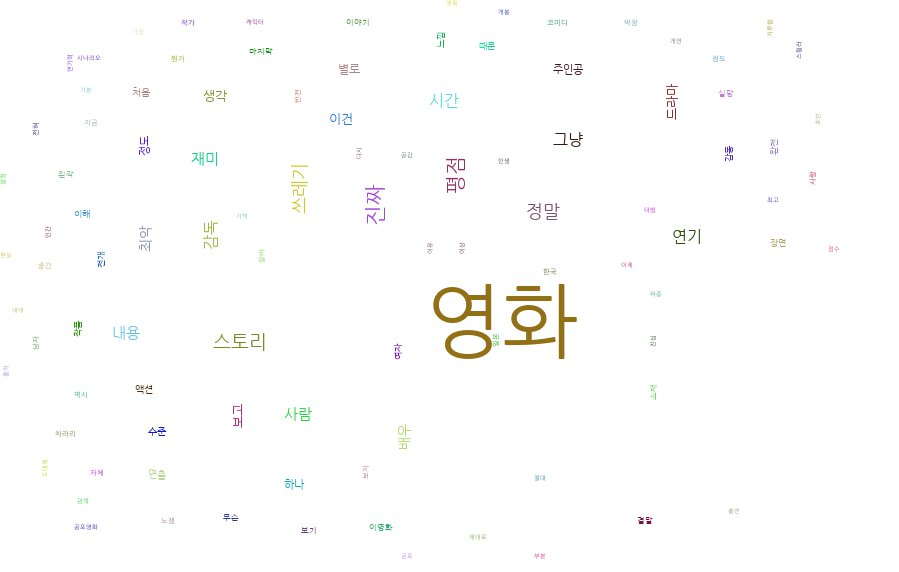

In [25]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
# 웹 브라우저 상에 이미지를 삽입하는 기능
Image(filename='wordcloud2.jpg')

## 딥러닝을 통한 입력 댓글을 분석하기(train data와 test data활용)
##### 데이터 가져오기

In [26]:
train_data = pd.read_table("ratings_train.txt")
train_data.head()
# 트레인 데이터 상위 5개 출력

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

In [27]:
test_data = pd.read_table("ratings_test.txt")
test_data.head()
# 테스트 데이터 상위 5개 출력

id                                           document  label
0  6270596                                                굳 ㅋ      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0

In [28]:
print("훈련용 데이터 갯수 :", len(train_data))

훈련용 데이터 갯수 : 150000


In [29]:
print("테스트용 데이터 갯수 :", len(test_data))

테스트용 데이터 갯수 : 50000


##### 데이터 정제

In [30]:
train_data["document"].nunique(), train_data["label"].nunique()
# nunique함수는 유니크한 데이터가 몇개인지 체크하는 것

(146182, 2)

##### document의 유니크한 값은 146182개 나머지는 중복값이다. label은 0과 1만 있기 때문에 2가 나온다

In [31]:
# 중복 데이터 삭제하기
train_data.drop_duplicates(subset=["document"], inplace=True)
# drop_duplicates함수는 중복값을 삭제해준다.
# 속성값 subset은 중복값을 찾을 열을 지정해주는 역할
# inplace 원본 데이터를 변경할지 결정하는 속성

In [32]:
len(train_data) # 전체 길이를 출력해서 유니크 값이랑 동일한지 확인(중복값 삭제 완료)

146183

In [33]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = "/Users/administrator/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
# 한글처리

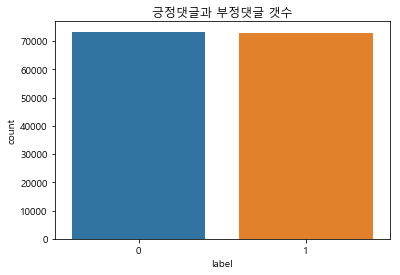

In [34]:
sns.countplot(x="label", data=train_data)
plt.title("긍정댓글과 부정댓글 갯수")
plt.show()

##### 긍정 부정의 갯수는 비슷
##### 결측치 제거 과정

In [35]:
#결측치 확인
print(train_data.isnull().values.any())
# 결측치가 있으면 True 없으면 False가 출력된다.

True


In [36]:
# 결측치 제거하기
train_data = train_data.dropna(axis=0)
# dropna함수로 결측치를 제거한다 속성값인 axis는 0일때 행 1일때 열을 삭제한다
print(len(train_data))
# 갯수를 찍어서 위랑 기존 결측치 제거 전 갯수를 비교 결측치 값은 1개 였다.

146182


In [37]:
print(train_data.isnull().values.any()) # 결측치가 있는지 리체크

False


##### 한글 공백 제외 제거

In [38]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', str(text))
    #입력받은 내용의 한글을 제외한 다른 문자를 빈문자열로 변경한다.
    return result

In [39]:
train_data["document"] = train_data["document"].apply(lambda x : text_cleaning(x))
train_data.head()

id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1

##### 한글 외 다 제거했으므로 다시 결측치 체크

In [40]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())
# 총 789개의 결측치가 생김 결측치를 제거해준다.

id            0
document    789
label         0
dtype: int64


In [41]:
# 결측치 제거하기
train_data = train_data.dropna(axis=0)
# dropna함수로 결측치를 제거한다 속성값인 axis는 0일때 행 1일때 열을 삭제한다.
len(train_data)

145393

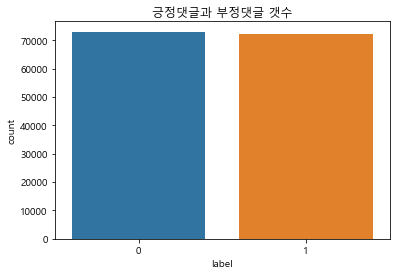

In [42]:
sns.countplot(x="label", data=train_data)
plt.title("긍정댓글과 부정댓글 갯수")
plt.show()
# 결측치가 전체 데이터에 비해 미미하므로 전체 비율은 큰 차이가 없다.

##### 테스트 데이터 처리해주기

In [43]:
test_data["document"].nunique()
# nunique함수는 유니크한 데이터가 몇개인지 체크하는 것

49157

In [44]:
test_data.drop_duplicates(subset=["document"], inplace=True)
len(test_data) # 중복데이터가 842개

49158

In [45]:
test_data["document"] = test_data["document"].apply(lambda x : text_cleaning(x))
test_data.head()

id                                   document  label
0  6270596                                        굳 ㅋ      1
1  9274899                                                 0
2  8544678           뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아      0
3  6825595                  지루하지는 않은데 완전 막장임 돈주고 보기에는      0
4  6723715  만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠      0

In [46]:
test_data['document'] = test_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
test_data['document'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())
# 총 306개의 결측치가 생김

id            0
document    306
label         0
dtype: int64


In [47]:
#  결측치를 제거해준다.
test_data = test_data.dropna(axis=0)
len(test_data)

48852

In [48]:
print("전 처리 후 트레인 데이터는", len(train_data), "개 이고, 테스트 데이터는", len(test_data), "개 이다.")

전 처리 후 트레인 데이터는 145393 개 이고, 테스트 데이터는 48852 개 이다.


### 토큰화처리
##### 불용어처리

In [49]:
stopwords = pd.read_csv("kostopword.txt") # 한글 불용어 파일 불러오기
stopwords = np.array(stopwords["stopword"].tolist()) # 불용어 사전을 비교할 수 있게 리스트 형태로 형변환

In [50]:
okt = Okt()
X_train = [] # 학습 시킬 데이터를 모아준다.
for X in train_data["document"]:
    tem_X = okt.morphs(X, stem=True) # 형태소 분석기를 돌려기 stem 속성을 활용해 일정 수준의 정규화를 진행
    tem_X = [X1 for X1 in tem_X if not X1 in stopwords]
    X_train.append(tem_X)

In [51]:
X_train[:5]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다'],
 ['무재', '밓었', '다그', '래서', '보다', '추천', '한', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '는', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다']]

In [52]:
len(X_train)

145393

In [53]:
X_test = [] # 학습 시킬 데이터를 모아준다.
for te in test_data["document"]:
    tem_te = okt.morphs(te, stem=True) # 형태소 분석기를 돌려기 stem 속성을 활용해 일정 수준의 정규화를 진행
    tem_te = [te1 for te1 in tem_te if not te1 in stopwords]
    X_test.append(tem_te)

In [54]:
X_test[:5]

[['굳다', 'ㅋ'],
 ['뭐', '평점', '은', '나쁘다', '않다', '점', '짜다', '리', '는', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'],
 ['만', '아니다', '별', '개', '주다', '나오다', '심기', '불편하다', '하다'],
 ['음악', '주가', '되다', '최고', '음악', '영화']]

In [55]:
len(X_test)

48852

##### 데이터를 숫자로 표현해서 컴퓨터가 인식할 수 있게 인코딩하기

In [56]:
import tensorflow as tf

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [58]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# fit_on_texts()는 각각의 단어에 번호를 부여한다.(빈도수에 따라 앞번호 분배)
# 정수 인코딩

In [59]:
print(tokenizer.word_index)
# 텍스트에 부여된 번호를 인덱스 순으로 출력! 빈도수에 따라 순번대로 번호가 부여된다.
# 1번을 가기는 영화가 가장 빈도수가 높은 단어이다.

{'영화': 1, '보다': 2, '하다': 3, '도': 4, '는': 5, '은': 6, '없다': 7, '이다': 8, '좋다': 9, '너무': 10, '다': 11, '정말': 12, '한': 13, '되다': 14, '재밌다': 15, '적': 16, '만': 17, '진짜': 18, '아니다': 19, '않다': 20, '점': 21, '만들다': 22, '나오다': 23, '연기': 24, '평점': 25, '내': 26, '최고': 27, '안': 28, '인': 29, '스토리': 30, '생각': 31, '못': 32, '드라마': 33, '게': 34, '감동': 35, '사람': 36, '보고': 37, '이렇다': 38, '말': 39, '고': 40, '아깝다': 41, '더': 42, '배우': 43, 'ㅋㅋ': 44, '감독': 45, '거': 46, '그냥': 47, '재미있다': 48, '요': 49, '재미': 50, '내용': 51, '뭐': 52, '중': 53, '주다': 54, '자다': 55, '하고': 56, '지루하다': 57, '재미없다': 58, '쓰레기': 59, '수': 60, '모르다': 61, '가다': 62, '들다': 63, '그렇다': 64, '싶다': 65, '지': 66, '작품': 67, '사랑': 68, '알다': 69, '다시': 70, '마지막': 71, '볼': 72, '잘': 73, '이건': 74, '정도': 75, '완전': 76, '오다': 77, 'ㅋ': 78, 'ㅠㅠ': 79, '많다': 80, '처음': 81, 'ㅋㅋㅋ': 82, '장면': 83, '액션': 84, '주인공': 85, '이렇게': 86, '안되다': 87, '걸': 88, '차다': 89, '나다': 90, '개': 91, '최악': 92, '돈': 93, '이야기': 94, '지금': 95, '넘다': 96, '느낌': 97, '임': 98, '연출': 99, 'ㅡㅡ': 100, '라': 101, '인데

In [60]:
tokenizer.word_counts
# key value 형태로 각 단어의 빈도수 확인 / 빈도수 확인 함수는 word_counts 활용

OrderedDict([('더빙', 573),
             ('진짜', 8312),
             ('짜증나다', 1010),
             ('목소리', 374),
             ('흠', 251),
             ('포스터', 572),
             ('보고', 4658),
             ('초딩', 422),
             ('영화', 50367),
             ('줄', 1241),
             ('오버', 142),
             ('연기', 6326),
             ('가볍다', 361),
             ('않다', 7722),
             ('무재', 69),
             ('밓었', 1),
             ('다그', 75),
             ('래서', 20),
             ('보다', 41072),
             ('추천', 1183),
             ('한', 9625),
             ('다', 10105),
             ('교도소', 16),
             ('이야기', 2171),
             ('구먼', 11),
             ('솔직하다', 1203),
             ('재미', 3879),
             ('는', 16930),
             ('없다', 15572),
             ('평점', 6266),
             ('조정', 40),
             ('사이', 222),
             ('몬페', 2),
             ('익살스럽다', 9),
             ('돋보이다', 288),
             ('스파이더맨', 64),
             ('늙다', 198),
             ('보이

##### 빈도수 3회 이하 제거

In [61]:
bindo = 3 # 빈도수 3 밑으로 제거할 기준
total_cnt = len(tokenizer.word_index) # 전체 총 단어의 수
rare_cnt = 0 # 빈도수가 bindo보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 빈도수가 bindo보다 작은 단어의 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    # word_counts의 리턴값이 단어와 빈도루 2개 이기 때문에 받아주는 값도 2개가 필요
    total_freq = total_freq + value # value는 빈도수이기 때문에 전체 빈도수에 추가

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < bindo):
        rare_cnt = rare_cnt + 1 # 빈도수가 bindo인 3보다 작으면 rare_cnt에 추가
        rare_freq = rare_freq + value # 빈도수가 3보다 작은 단어의 빈도수를 rare_freq에 추가

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(bindo - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43511
등장 빈도가 2번 이하인 희귀 단어의 수: 24308
단어 집합에서 희귀 단어의 비율: 55.8663326515134
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.946010337061098


In [62]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
voca_size = total_cnt - rare_cnt + 1
print('빈도수가 3번 이상인 단어 집합의 크기 :',voca_size)

빈도수가 3번 이상인 단어 집합의 크기 : 19204


In [63]:
len(X_train)

145393

In [64]:
voca_size

19204

In [65]:
tokenizer = Tokenizer(voca_size) # 빈도수가 높은 19204개(voca_size)만 가지고 토큰화를 시켜준다.
tokenizer.fit_on_texts(X_train) # X_train은 약 14만개의 데이터이지만 빈도수에 따라 위어서부터 번호를 부여하는 fit_on_texts를 사용
# 빈도수가 3개 이상인 19204개의 데이터을 활용해서 X_train데이터가 정수인코딩을 받는다.
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
# texts_to_sequences함수는 fit_on_texts함수로 부여된 정수를 가지고 각각의 데이터 값이 어떤 정수로 이루어져있는지 부여하는 함수

In [66]:
X_train[:5] # 리스트의 각 데이터가 어떤 정수값으로 이루어져있는지 확인

[[410, 18, 229, 593],
 [852, 413, 37, 542, 1, 189, 1349, 24, 607, 20],
 [2314, 2189, 5505, 2, 196, 13, 11],
 [6322, 94, 7939, 193, 50, 5, 7, 25, 3453],
 [938, 8959, 24, 754, 1, 2445, 1021, 212, 3, 14041, 990, 224, 212]]

In [67]:
pd.DataFrame(X_train)
# 19204개 빈도수가 3 미만인 단어는 NaN처리

0        1        2       3        4       5        6        7   \
0         410.0     18.0    229.0   593.0      NaN     NaN      NaN      NaN   
1         852.0    413.0     37.0   542.0      1.0   189.0   1349.0     24.0   
2        2314.0   2189.0   5505.0     2.0    196.0    13.0     11.0      NaN   
3        6322.0     94.0   7939.0   193.0     50.0     5.0      7.0     25.0   
4         938.0   8959.0     24.0   754.0      1.0  2445.0   1021.0    212.0   
5         650.0   5506.0    898.0  1288.0    387.0  1583.0   1523.0  11364.0   
6         188.0    282.0    291.0   435.0      3.0     NaN      NaN      NaN   
7         113.0    995.0      4.0    41.0    298.0    23.0   9598.0  14042.0   
8          84.0      7.0     50.0    87.0      1.0     NaN      NaN      NaN   
9        1434.0     25.0    178.0   485.0     72.0    17.0     13.0    352.0   
10        341.0   4525.0    142.0     8.0     18.0   142.0      8.0      NaN   
11        669.0    346.0   1136.0   180.0    335.0  2394.0    308.0  11365.0   
12       2116.0    127.0    782.0    40.0   9599.0  1160.0    249.0    842.0   
13       2339.0   1137.0      9.0   427.0   1097.0   110.0   1373.0      2.0   
14        794.0      6.0   3748.0    13.0   5888.0    17.0     18.0   1705.0   
15       1594.0   1114.0   1271.0    14.0   2046.0    79.0      NaN      NaN   
16         89.0     36.0    167.0  6564.0   1175.0   116.0   7173.0    569.0   
17       5334.0  11366.0   1082.0    29.0      6.0   114.0      3.0    441.0   
18         74.0     12.0   2340.0   414.0  16055.0    66.0     20.0   6846.0   
19      14043.0    273.0     13.0  4323.0    573.0   315.0      6.0    958.0   
20        305.0   1786.0   1138.0     4.0    103.0    47.0   1422.0   2446.0   
21          2.0    274.0     20.0   269.0   3030.0     NaN      NaN      NaN   
22         58.0     57.0   2047.0     1.0    102.0     4.0   8960.0     56.0   
23        323.0    715.0      1.0    19.0    357.0   251.0   1121.0  11368.0   
24        590.0      5.0      9.0   762.0     57.0     NaN      NaN      NaN   
25         11.0   2746.0      3.0    60.0      7.0    64.0    131.0     64.0   
26       6565.0   4526.0    122.0     3.0      NaN     NaN      NaN      NaN   
27       8448.0   2931.0    519.0     NaN      NaN     NaN      NaN      NaN   
28          NaN      NaN      NaN     NaN      NaN     NaN      NaN      NaN   
29       2070.0     99.0    326.0  2395.0    414.0   335.0   2394.0     21.0   
...         ...      ...      ...     ...      ...     ...      ...      ...   
145363  18800.0      5.0   1454.0     2.0    108.0  1875.0      6.0     32.0   
145364    160.0   4460.0     40.0    65.0      1.0    10.0      9.0      NaN   
145365     76.0   4253.0    228.0    24.0     35.0     NaN      NaN      NaN   
145366     68.0    279.0    392.0   277.0     16.0     3.0     22.0    509.0   
145367    337.0     45.0  10390.0  1783.0   1511.0  1331.0   5191.0   5439.0   
145368   5677.0   4711.0   6490.0  1826.0     72.0    34.0      7.0      NaN   
145369   1570.0    809.0     16.0  1851.0     33.0     NaN      NaN      NaN   
145370    232.0      6.0    173.0   449.0   9549.0    13.0   4380.0      7.0   
145371     39.0     42.0    543.0     NaN      NaN     NaN      NaN      NaN   
145372    347.0   3048.0      3.0    21.0      6.0    23.0     14.0   1913.0   
145373     43.0     41.0      NaN     NaN      NaN     NaN      NaN      NaN   
145374     18.0    167.0    774.0     1.0     12.0  1179.0      1.0      5.0   
145375     41.0    156.0    552.0    24.0      5.0   406.0     16.0      8.0   
145376     25.0     10.0    178.0  1587.0   1913.0   215.0    115.0     18.0   
145377     47.0     31.0    154.0    25.0    198.0    63.0    135.0     43.0   
145378   4402.0      3.0     75.0   373.0    166.0    36.0    816.0    291.0   
145379   1334.0      3.0    305.0    29.0   5725.0     1.0     74.0     19.0   
145380    295.0     41.0     18.0    91.0   1308.0    26.0     41.0      NaN   
145381     77

In [68]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])
# 정답값 부여

In [69]:
len(X_train[0]) # value의 갯수(정수값이 부여된 갯수)

4

##### NAN값으로만 이루어진 행을 삭제해주기

In [70]:
drop_train = [index for index, value in enumerate(X_train) if len(value) < 1]
# X_train의 value값의 길이가 1보다 작으면(인덱스의 데이터가 모두 NaN일때)
# 해당 인덱스를 drop_train에 넣어라
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
# drop_train으로 X_train의 NAN값을 가지는 행의 y_train도 삭제를 해줘야 문제와 정답값을 매칭 시킬 수 있다.
print(len(X_train))
print(len(y_train))
# 문제와 정답 갯수를 확인.

145036
145036


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### 패딩
##### 데이터의 길이를 맞춰주는 작업

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.385869715105216


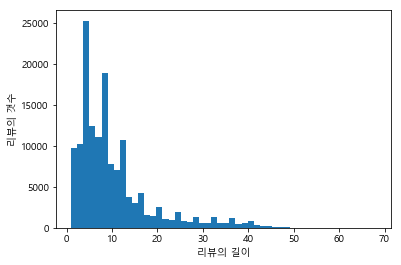

In [71]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
# map함수 (메서드, 변수) 변수를 각 메서드를 처리해서 값을 도출함. 그걸 다 더함(모든 데이터의 길이의 종합)
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('리뷰의 길이')
plt.ylabel('리뷰의 갯수')
plt.show()

In [72]:
# 데이터 길이 측정 함수 정의
def below_threshold_len(max_len, train_data):
  cnt = 0
  for s in train_data:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(train_data))*100))

In [73]:
X_train

array([list([410, 18, 229, 593]),
       list([852, 413, 37, 542, 1, 189, 1349, 24, 607, 20]),
       list([2314, 2189, 5505, 2, 196, 13, 11]), ...,
       list([34, 52, 49, 1348, 6, 5435, 14426, 40, 10272, 10208, 6, 958]),
       list([954, 1, 2139, 2792, 1132, 490, 7670]),
       list([173, 1, 1699, 3, 51, 1262, 1])], dtype=object)

In [74]:
# 히스토그램을 통해서 배부분의 데이터의 길이가 35 이하라고 확인
max_len = 35
below_threshold_len(max_len, X_train)
# 데이터 길이를 35로 제한!

전체 샘플 중 길이가 35 이하인 샘플의 비율: 97.04831903803193


In [75]:
# 데이터 길이를 35로 제한!
# pad_sequences 함수는 가변 길이를 제공하는 함수. (입력값, 가변길이) 가변길이의 디폴트는 0으로 세팅
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
# 모든 데이터의 길이를 35로 맞춰준다.

##### LSTM으로 최종 긍정 부정 분류하기

In [76]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [77]:
model = Sequential()
# 케라스 시퀀셜을 하나의 입력과 출력을 가짐 다음 셀로 이동시키는 기능!
model.add(Embedding(voca_size, 100)) # 정수화 시키는 것(전체 단어의 집합을 벡터의 크기를 100으로 임베딩한다.)
model.add(LSTM(128)) # 128개의 셀로 LSTM을 사용
model.add(Dense(1, activation='sigmoid')) # 처음 인자 출력 갯수, 활성 함수는 sigmoid사용(binary classification)

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1920400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,037,777
Trainable params: 2,037,777
Non-trainable params: 0
_________________________________________________________________


In [79]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# 조건에 해당하면 처리 과정을 멈춰라, val_loss를 모니터링 하고 손실값이기 때문에 mode는 최소인 min으로 설정
# verbose=1은 언제 멈췄는지 화면에 찍어주는 역할, patience 성능이 증가하지 않을때 몇번 더 시도할 것인지 지정
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# 정확도를 모니터하여 최대값을 가지는 파라미터 모델을 best_model.h5 이름으로 저장한다.

In [80]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# 모델을 컴파일 할때는 정규화기, 손실함수, 평가지표 3가지를 설정한다.
# rmsprop는 최신 기울기의 반영 비율이 더 높은 방식, binary_corssentropy는 output layer가 sigmod일떄 사용
# 분류값이기 때문에 평가지표는 정확도를 사용한다.
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)
# epcohs는 15회를 사용하고 20%의 데이터를 검증용으로 분류한다.
# 얼리스탑과 모델체크포인트를 콜백하여 사용한다.

Epoch 1/15
1934/1934 [==============================] - ETA: 0s - loss: 0.3918 - acc: 0.8221
Epoch 00001: val_acc improved from -inf to 0.84446, saving model to best_model.h5
1934/1934 [==============================] - 70s 36ms/step - loss: 0.3918 - acc: 0.8221 - val_loss: 0.3526 - val_acc: 0.8445
Epoch 2/15
1933/1934 [============================>.] - ETA: 0s - loss: 0.3301 - acc: 0.8564
Epoch 00002: val_acc improved from 0.84446 to 0.85301, saving model to best_model.h5
1934/1934 [==============================] - 71s 37ms/step - loss: 0.3301 - acc: 0.8564 - val_loss: 0.3381 - val_acc: 0.8530
Epoch 3/15
1934/1934 [==============================] - ETA: 0s - loss: 0.3054 - acc: 0.8699
Epoch 00003: val_acc improved from 0.85301 to 0.85525, saving model to best_model.h5
1934/1934 [==============================] - 73s 38ms/step - loss: 0.3054 - acc: 0.8699 - val_loss: 0.3338 - val_acc: 0.8552
Epoch 4/15
1934/1934 [==============================] - ETA: 0s - loss: 0.2873 - acc: 0.8795
E

In [81]:
loaded_model = load_model('best_model.h5')
# 모델체크포인트로 성능이 가장 좋은 모델을 가져온다.
# 성능이 가장 좋은 모델로 테스트용 데이터를 검증한다.
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 11s 7ms/step - loss: 0.3462 - acc: 0.8540

 테스트 정확도: 0.8540


In [82]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화, stem으로 일반적인 정규화 과정 처리
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [83]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

94.98% 확률로 긍정 리뷰입니다.



In [84]:
sentiment_predict('씹꾸르잼임')

64.87% 확률로 부정 리뷰입니다.



In [85]:
sentiment_predict('씹꿀잼')

96.13% 확률로 긍정 리뷰입니다.



In [86]:
sentiment_predict('반신반의해요 너무뻔한데요')

80.78% 확률로 부정 리뷰입니다.



In [87]:
sentiment_predict('재미있기는한데, 중간에지루해요')

70.64% 확률로 부정 리뷰입니다.



In [88]:
sentiment_predict('이 영화!!!')

71.01% 확률로 부정 리뷰입니다.



In [89]:
sentiment_predict('굿')

98.32% 확률로 긍정 리뷰입니다.



In [90]:
sentiment_predict('나는 좀 그래요')

88.18% 확률로 부정 리뷰입니다.



In [91]:
sentiment_predict('재밌다고해서 봤는데 영화관에서 돈주고보긴 아깝네요')

91.65% 확률로 부정 리뷰입니다.

